In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# grayscale pixels have a lightness of 0-255

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) # turns in to one big line of 28x28 pixels = 748 pixels
model.add(tf.keras.layers.Dense(128, activation = 'relu')) #activation layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) #allows for confidence percentage

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3135 - accuracy: 0.9138
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1389 - accuracy: 0.9597
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0954 - accuracy: 0.9715


In [13]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [14]:
model = tf.keras.models.load_model('handwritten.model')

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9697


In [16]:
print(loss)
print(accuracy)

0.09968414902687073
0.9696999788284302


1/1 [==============================] - 0s 38ms/step
This image is probably a 5


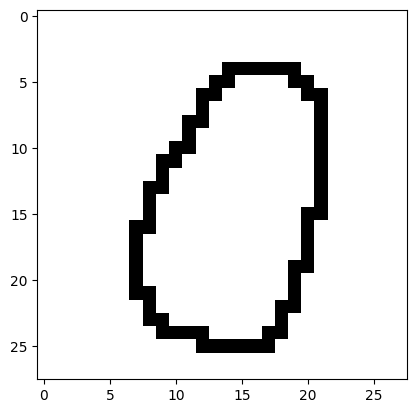

1/1 [==============================] - 0s 34ms/step
This image is probably a 3


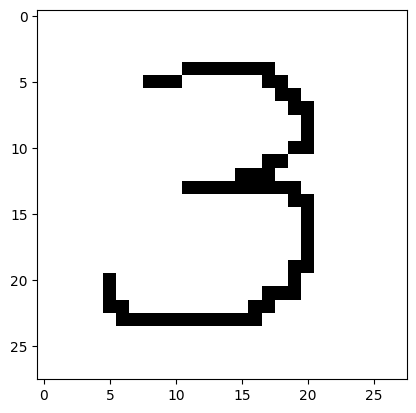

1/1 [==============================] - 0s 50ms/step
This image is probably a 2


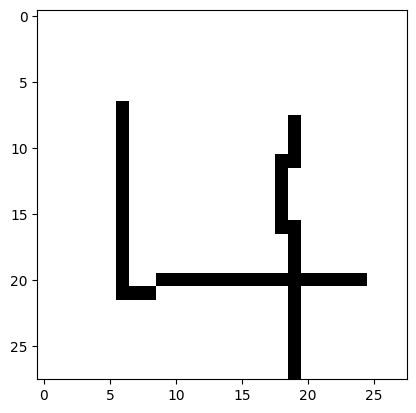

1/1 [==============================] - 0s 26ms/step
This image is probably a 5


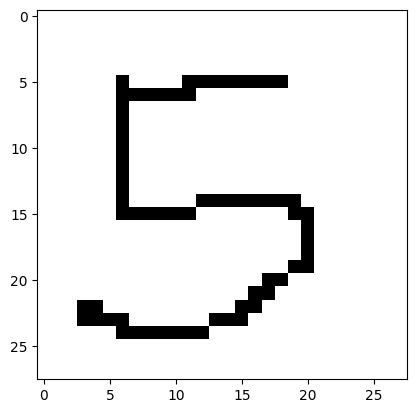

1/1 [==============================] - 0s 33ms/step
This image is probably a 9


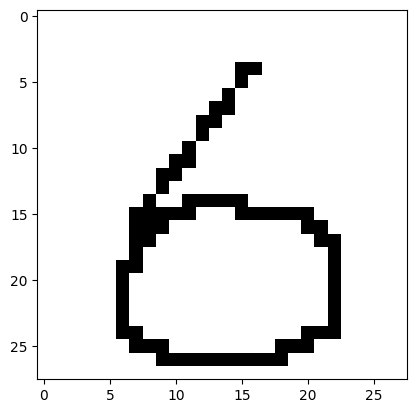

In [19]:
image_numbers = [0,3,4,5,6]
for image_number in image_numbers:
        img = cv2.imread(f"C:/Users/njmar/Desktop/Projects/handwritten digits model/test numbers/{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This image is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
    
    
